<a href="https://colab.research.google.com/github/codithj/stock_prediction_with_ml/blob/main/correlation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 연동

In [108]:
import os
print(os.getcwd())
!ls

/content
gdrive	sample_data


In [109]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


라이브러리 임포팅

In [110]:
import os
import sys
import warnings
if not sys.warnoptions:
  warnings.simplefilter('ignore')
import time
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import seaborn as sns

SnP500과 인덱스 5개 불러오기

In [111]:
# SnP500 
idx_snp500 = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_snp500.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)

# 10년 채권
idx_bond = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_bond.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)
# 유로/달러 환율
idx_eurodollar = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_eurodollar.csv",
                              usecols=[1,2,3,4,5],
                              index_col=[0],
                              parse_dates=True)
# gbp/달러 환율
idx_gbpdollar = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_gbpdollar.csv",
                              usecols=[1,2,3,4,5],
                              index_col=[0],
                              parse_dates=True)
# 금 가격
idx_gold = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_gold.csv",
                        usecols=[1,2,3,4,5],
                        index_col=[0],
                        parse_dates=True)
# 은 가격
idx_silver = pd.read_csv("/content/gdrive/My Drive/study/data/index_csv/index_silver.csv",
                          usecols=[1,2,3,4,5],
                          index_col=[0],
                          parse_dates=True)


종가로 결측치 보간

In [112]:
snp500 = idx_snp500['close']
count = 0
for t in snp500:
  t = t.replace(',', '')
  snp500[count] = t
  count += 1

bond = idx_bond['close']
eurodollar = idx_eurodollar['close']
gbpdollar = idx_gbpdollar['close']
gold = idx_gold['close']
silver = idx_silver['close']

In [113]:
def interpolate(df):
    print('before:', df.isnull().sum())
    df = df.interpolate(method='time')
    print('after:',df[df.isna()])
    print('after:',df.isnull().sum())
    return df
    

In [114]:
snp500 = snp500.astype(np.float64)
snp500 = interpolate(snp500)
bond = interpolate(bond)
eurodollar = interpolate(eurodollar)
gbpdollar = interpolate(gbpdollar)
gold = interpolate(gold)
silver = interpolate(silver)

before: 0
after: Series([], Name: close, dtype: float64)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0
before: 21
after: Series([], Name: close, dtype: float64)
after: 0
before: 21
after: Series([], Name: close, dtype: float64)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0
before: 8
after: Series([], Name: close, dtype: float64)
after: 0


정규화

In [115]:
snp500 /= 1000
bond /= 1000
eurodollar /= 1000
gbpdollar /= 1000
gold /= 1000
silver /= 1000

snp500 = snp500.values.reshape(-1,1)
bond = bond.values.reshape(-1,1)
eurodollar = eurodollar.values.reshape(-1,1)
gbpdollar = gbpdollar.values.reshape(-1,1)
gold = gold.values.reshape(-1,1)
silver = silver.values.reshape(-1,1)

데이터프레임으로 바꾸기


In [116]:
df = pd.DataFrame({'snp500': np.array(snp500).flatten(),
                   'bond': np.array(bond).flatten(),
                   'eurodollar': np.array(eurodollar).flatten(),
                   'gbpdollar': np.array(gbpdollar).flatten(),
                   'gold': np.array(gold).flatten(),
                   'silver': np.array(silver).flatten()})





상관관계 구하기

In [117]:
df_corr = df.corr()
print(df_corr)

              snp500      bond  eurodollar  gbpdollar      gold    silver
snp500      1.000000  0.718654    0.367845   0.433831 -0.639181 -0.402039
bond        0.718654  1.000000    0.105169   0.279422 -0.940425 -0.653880
eurodollar  0.367845  0.105169    1.000000   0.815060  0.170106  0.525120
gbpdollar   0.433831  0.279422    0.815060   1.000000 -0.022404  0.337413
gold       -0.639181 -0.940425    0.170106  -0.022404  1.000000  0.851967
silver     -0.402039 -0.653880    0.525120   0.337413  0.851967  1.000000


매트릭스

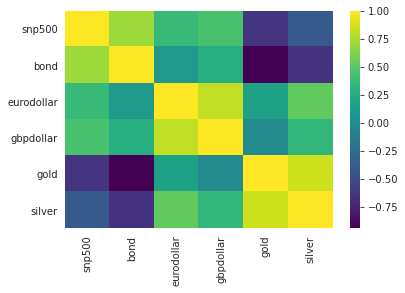

In [118]:
sns.heatmap(df_corr, cmap='viridis')
plt.show()